In [1]:
!unzip bloodcancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-037.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-038.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-039.jpg  
  inflating: Original/Pre/WBC-Malignant-Pre-040.jpg  
  inflating: Original/Pre/WBC-M

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2

In [5]:
dataset_dir = '/content/Original'
class_names = ['Benign', 'Pre', 'Pro', 'Early']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)
dataset_dir = '/content/Segmented'
class_names = ['Benign', 'Pre', 'Pro', 'Early']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)
images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [6]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])
categorical_labels = to_categorical(numerical_labels)
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)


In [7]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)




In [8]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 301s 4s/step - accuracy: 0.4739 - loss: 145.4869 - val_accuracy: 0.6457 - val_loss: 0.9875
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.7759 - loss: 0.7839 - val_accuracy: 0.7561 - val_loss: 0.7715
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 313s 4s/step - accuracy: 0.9207 - loss: 0.3943 - val_accuracy: 0.7745 - val_loss: 0.6962
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.9747 - loss: 0.1801 - val_accuracy: 0.7669 - val_loss: 0.9401
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 298s 4s/step - accuracy: 0.9841 - loss: 0.0926 - val_accuracy: 0.7807 - val_loss: 0.8434
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.9942 - loss: 0.0445 - val_accuracy: 0.7791 - val_loss: 1.0054
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.9763 - loss: 0.1007 - val_accuracy: 0.7745 - val_loss: 0.9255
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.9897 - loss: 0.0502 - val_accuracy: 0.7515 -

In [9]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
if train_acc > test_acc + 0.1 :
    print("Model is likely overfitting.")
elif train_acc > test_acc:
  print("Model may be slightly overfitting")
else:
    print("Model does not appear to be overfitting.")

Train accuracy: 0.9988479018211365
Test accuracy: 0.7561349868774414
Model is likely overfitting.


In [10]:
if train_acc > test_acc + 0.1:
    print("Model is likely overfitting. Applying regularization techniques.")
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print('Train accuracy after regularization:', train_acc)
    print('Test accuracy after regularization:', test_acc)

elif train_acc > test_acc:
    print("Model may be slightly overfitting. Consider regularization or more data.")
else:
    print("Model does not appear to be overfitting.")


Model is likely overfitting. Applying regularization techniques.
Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 330s 4s/step - accuracy: 0.3820 - loss: 137.3404 - val_accuracy: 0.6012 - val_loss: 1.0730
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.6534 - loss: 0.9026 - val_accuracy: 0.6212 - val_loss: 1.0942
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 379s 4s/step - accuracy: 0.7456 - loss: 0.6632 - val_accuracy: 0.6794 - val_loss: 0.9559
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.6657 - loss: 0.9530 - val_accuracy: 0.7193 - val_loss: 0.8130
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.7833 - loss: 0.6644 - val_accuracy: 0.7684 - val_loss: 0.6537
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 361s 4s/step - accuracy: 0.8406 - loss: 0.4996 - val_accuracy: 0.8098 - val_loss: 0.5671
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.8699 - loss: 0.3912 - val_accuracy: 0.8129 - val_loss: 0.4791
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 323s 4

In [11]:
# prompt: save the model

model.save('blood_cancer_model.h5')

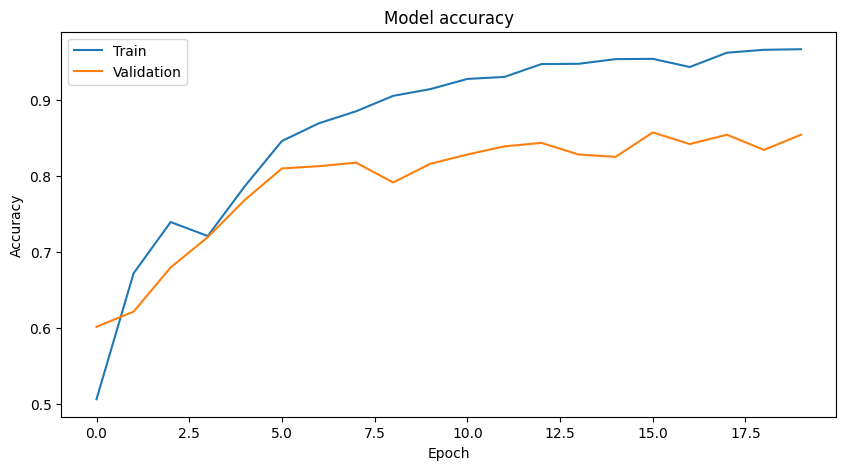

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Accuracy: 0.8542944785276073
Precision: 0.8595275017140079
Recall: 0.8542944785276073
F1-score: 0.8531305360606252


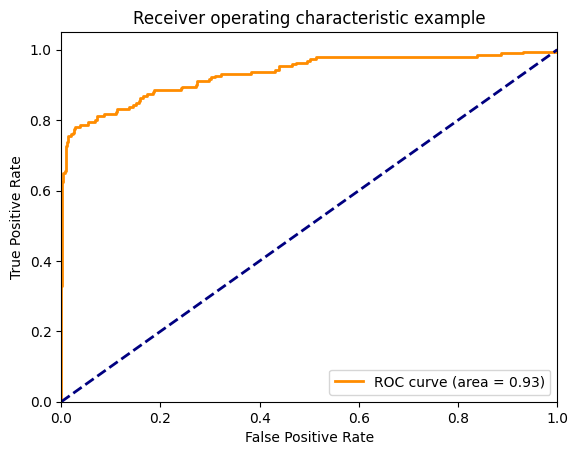

In [16]:
# prompt: Once the model is finalized, evaluate its performance on the test set using metrics like accuracy, precision, recall, F1-score, and AUC-ROC curve.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming 'model' and 'X_test', 'y_test' are defined from previous code
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(y_test, axis = 1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') # Use weighted for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


# Binarize the output for ROC AUC
y_true_binarized = label_binarize(y_true, classes=np.unique(y_true))
n_classes = y_true_binarized.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred_probabilities[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_pred_probabilities.ravel())
roc_auc["micro"] = roc_auc_score(y_true_binarized, y_pred_probabilities, average="micro")

#Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input # Import the correct preprocess_input

# Load the saved model
model = load_model('blood_cancer_model.h5')

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Now preprocess_input is defined

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_names = ['Benign', 'Early', 'Pre', 'Pro']  # Replace with your actual class names
    predicted_label = class_names[predicted_class]

    print(f"Predicted class: {predicted_label}")

# Example usage (replace 'path/to/your/image.jpg' with your image path)
# uploaded = files.upload()
# for fn in uploaded.keys():
#   predict_image(fn)
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  predict_image(fn)

Saving siva1.jpg to siva1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted class: Pro


In [ ]:


!pip install flask
from flask import Flask, request, jsonify
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

app = Flask(__name__)
model = tf.keras.models.load_model('blood_cancer_model.h5')

# Define the label mapping (assuming you have it defined elsewhere in your code)
label_mapping = {0: 'Benign', 1: 'Pre', 2: 'Pro', 3: 'Early'}  # Example

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    img_file = request.files['image']
    img = image.load_img(img_file, target_size=(224, 224))  # Resize as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = label_mapping.get(predicted_class_index, 'Unknown')

    # Consider returning probabilities for all classes
    probabilities = prediction.tolist()[0]

    response = {
        'predicted_class': predicted_class,
        'probabilities': probabilities
    }
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
